# This will be a title

# This is a notebook
this is a a jupyter notebook. Each celll can contain some code, or a text field in 'markdown'.
It is also great to demonstrate how cool python can be for spatial data programming/data science...


In [ ]:
this cell has not been executed. Also note, that when you click on it, it is set as of type `code` above. If you change this to markdown, it will look the same before being executed

this cell has not been executed, but has been set as markdown in the menu above

And this is how it will look when executed ( using shift+enter)

## Installation of libraries in conda
Sometimes we want to use code written by others. In Azure notebooks, or in Anaconda, we use the conda packaging system.
Pip is another such systme that comes with Python natively. Conda can do a bit more.
Below, the -y at the end enables the installation to go without prompts from user, necessary for some libraries

*BUT STOP* We do not want to do this! This can mess up your environment. We want to install these in a safely run conda environment.

*We will now proceed through the demo - I have done the steps below. We will come back to this.*

## Set up your Conda environment

The documentation for this is in the markdown file: `instructions.md` (instructions.md)[instructions.md](instructions.md)

## quick and dirty - do not do the below if you can avoid.

the tricks below are ok if you are running already a conda environment, maybe empty, and want to add things to it. Also, on the server, proceeding this way will not work, as you do not have permissions

In [1]:
# this is a comment.
# We will install the library called shapely
!conda install shapely -y

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geos-3.8.1                 |       he1b5a44_0         1.0 MB  conda-forge
    shapely-1.7.1              |   py38h2765ab7_1         430 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  geos               conda-forge/linux-64::geos-3.8.1-he1b5a44_0
  shapely            conda-forge/linux-64::shapely-1.7.1-py38h2765ab7_1



shapely-1.7.1        | 430 KB    | ##################################### | 100% 
geos-3.8.1           | 1.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The 

In [ ]:
!conda install pyproj -y

## Doing stuff the proper way - contd.

Go back to terminal, and install the packages needed into the environment.

# Demonstration of spatial data coding

*this assumes that we are running in an environment that has matplotlib, shapely, geopandas installed*

A notebook is a magical place - it can not only execute the code, but helps with the visualizations, too. It allows you to interseprse code with comments. This is called literate programming.

We will explore a lot of spatial functionalities here - and be able to visualize them.


In [1]:
#Import (parts of) this shapely library we have installed
from shapely.geometry import Point, Polygon

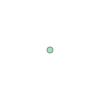

In [2]:
# let's draw a point
p = Point(0.5,0.5)
p


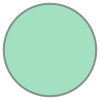

In [3]:
# we will do a spatial operation - buffer - to have a space of 0.1 units around this point
pb = p.buffer(1)
pb

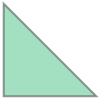

In [5]:
# let's make anothe r geometry, now of type Polygon
pol = Polygon([(0,0),(0,1),(1,0),(0,0)])
pol

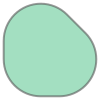

In [9]:
#We can buffer this - create an area within a defined distance:
polb1 = pol.buffer(2)
polb1

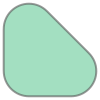

In [10]:
# let's do this again, a few times. We now have a few more buffers, 
# some of negativedistance! And some for another geometry
polb2 = pol.buffer(0.5)
polc = Polygon([(2,0),(2,1),(3,0),(2,0)]).buffer(1.1)
polc
polc2 = polc.buffer(-0.5)
polc2

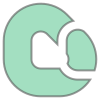

In [11]:
sp = polb1.difference(polb2)
sp2 = polc.difference(polc2)
sp.difference(sp2)

In [12]:
# we can make basic spatial operations
polb1.contains(pb)

True

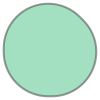

In [14]:
# let's see what we get if we increase the buffer
polb = pol.buffer(12)
polb

# Some more useful libraries you will discover later on

`#!conda install fiona -y #for working with some spatial datasets`
`#!conda install matplotlib -y # matplotlib is for general plotting support in python`
`#!conda install geopandas -y # geopandas contains fiona already. Python  data frames`
`#!conda install folium -y # for display of spatial data as slippy maps`

Again, it is better to do this in the command line: `conda install matplotlib geopandas folium`

In [13]:
# and for larger data
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import os # for working with paths
import fiona

We will open a shapefile - a *folder-based* (multifile) spatial datasetm, with some road centerlines.

In [14]:
# useful to check whether we have written the path correctly. 
# We will discuss paths in a few weeks - as well as better ways to write them.
cwd = os.getcwd()
data_path = ('../data/drogi250.shp')
os.path.isfile(data_path)

True

In [15]:
# We will open a real dataset of spatial data
with fiona.open(data_path, 'r') as source:
    print(source.schema) # this will print the structure of the dataset. What can you see?
   # for f in source:
   #     g = shape(f['geometry'])
   #     print(g.length)

{'properties': OrderedDict([('FNODE_', 'int:10'), ('TNODE_', 'int:10'), ('LPOLY_', 'int:10'), ('RPOLY_', 'int:10'), ('LENGTH', 'float:24.5'), ('DROGI_', 'int:10'), ('DROGI_ID', 'int:10'), ('ID_GDDP', 'str:10'), ('ADM', 'float:24.5'), ('KAT', 'float:24.5'), ('STN', 'float:24.5'), ('NAW', 'float:24.5'), ('LOK', 'float:24.5'), ('PAS', 'float:24.5'), ('NR_K1', 'str:5'), ('NR_K2', 'str:5'), ('NR_M1', 'str:5'), ('NR_M2', 'str:5'), ('DLG', 'float:24.5'), ('ID1', 'int:10')]), 'geometry': 'LineString'}


In [16]:
#from osgeo import gdal, gdalnumeric, ogr, osr
gdf = gpd.read_file(data_path)

<AxesSubplot:>

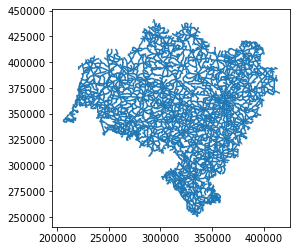

In [17]:
gdf.plot()

In [18]:
gdf.columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'DROGI_', 'DROGI_ID',
       'ID_GDDP', 'ADM', 'KAT', 'STN', 'NAW', 'LOK', 'PAS', 'NR_K1', 'NR_K2',
       'NR_M1', 'NR_M2', 'DLG', 'ID1', 'geometry'],
      dtype='object')

array([[<AxesSubplot:title={'center':'LENGTH'}>]], dtype=object)

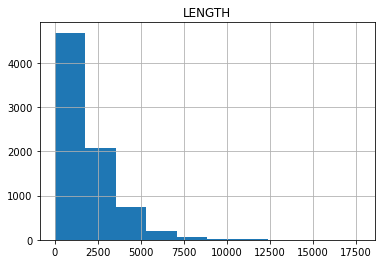

In [19]:
gdf.hist(column='LENGTH',bins=10)

In [21]:
# if you want to investigate versions 
fiona.supported_drivers
#fiona.__version__

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}